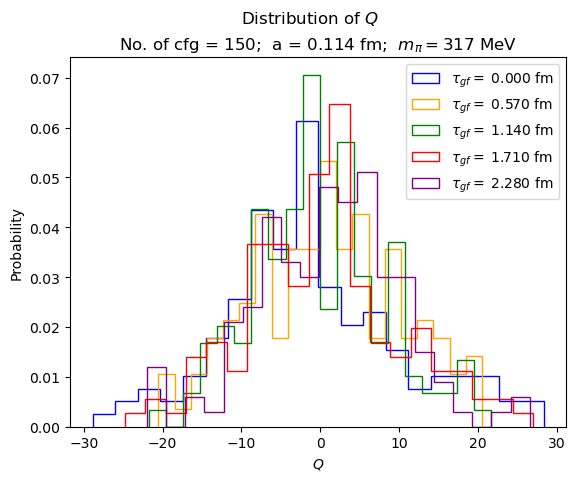

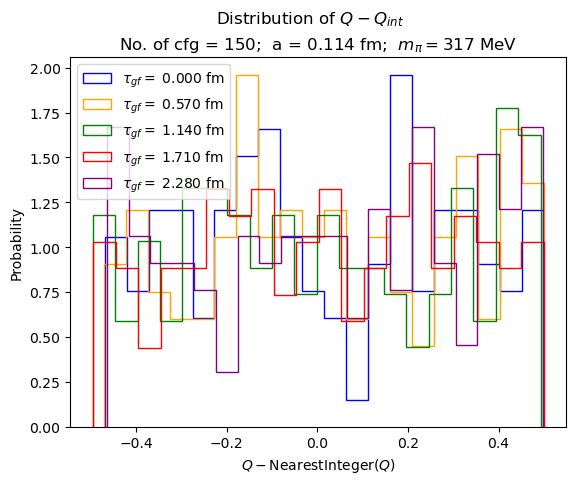

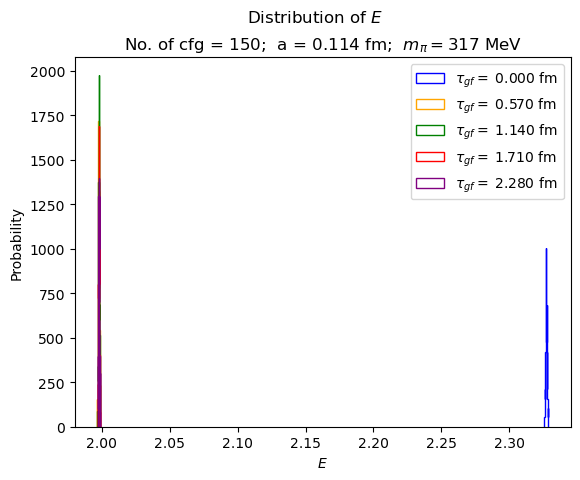

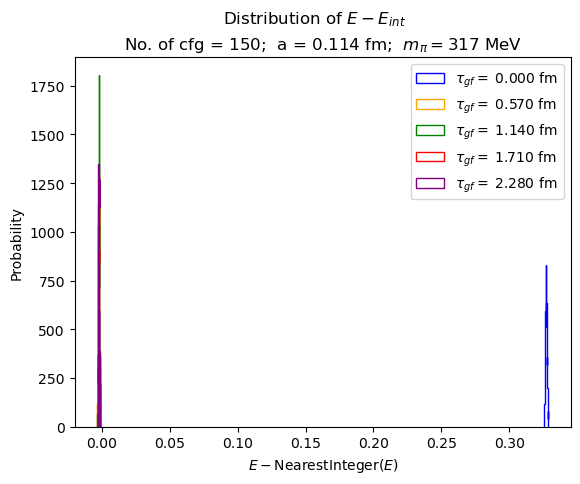

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

a = 0.114
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
#flow_time = {0, 1.4}
flow_time = [0, 5, 10, 15, 20]
#flow_time = {2, 4, 6, 8, 10, 12, 20}
#flow_time = {0, 6, 12, 20}
#flow_time = {0, 200, 700, 1000} flow_time = {0, 0.86, 1.40, 10}
#{1.8, 2.5, 3.5, 4, 4.5, 5, 5.5, 6.5, 10}
def list_observ(observable, ft):
    file_path = f"/pscratch/sd/h/hari_8/nEDM_project_LANL/save_GF_h5/save_EQ_GradientFlow_beta_6d1_cfgs_ft_lattice_a_units_.h5"
    h5_file = h5py.File(file_path, "r")
    observable_cfg = []
    for cfgb in range(1776, 2092+1, 4):
        path_to_observable_cfgb = f"/b_cfg_{cfgb}/{observable}/flow_time_{ft}_fm"
        observable_cfgb = h5_file[path_to_observable_cfgb][()] 
        observable_cfg.append(observable_cfgb)
    for cfga in range(1336, 1560+1, 4): #1612
        path_to_observable_cfga = f"/a_cfg_{cfga}/{observable}/flow_time_{ft}_fm" #_fm
        observable_cfga = h5_file[path_to_observable_cfga][()]
        observable_cfg.append(observable_cfga)
    return observable_cfg


def plt_histogram(observable, flow_time_list):
    for idx, f_t in enumerate(flow_time_list):
        observable_list = list_observ(observable, f_t)
        plt.hist(observable_list, histtype='step', bins=20, density=True, color=colors[idx], label="$\\tau_{gf}=$ %.3f fm" % (f_t*a))
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel("$E$")
    plt.title("No. of cfg = 150;  a = 0.114 fm;  $m_{\pi} = 317$ MeV")
    plt.suptitle("Distribution of $E$")
    #plt.savefig("Distribution_of_E_%s.pdf"%(observable), dpi=50000)
    plt.show()
    return

def plt_histogram_minu_nearestinteger(observable, flow_time_list):
    for idx, f_t in enumerate(flow_time_list):
        observable_list = list_observ(observable, f_t)
        nearestinteger_diff_observable_list = [value - round(value) for value in observable_list]
        plt.hist(nearestinteger_diff_observable_list, histtype='step', bins=15, density=True, color=colors[idx],  label="$\\tau_{gf}=$ %.3f fm" % (f_t*a))
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel("$E-$NearestInteger$(E)$")
    plt.title("No. of cfg = 150;  a = 0.114 fm;  $m_{\pi} = 317$ MeV")
    plt.suptitle("Distribution of $E-E_{int}$")
    #plt.savefig("Distribution_of_E_E_int_%s.pdf"%(observable), dpi=50000)
    plt.show()
    return

def plt_histogramQ(observable, flow_time_list):
    for idx, f_t in enumerate(flow_time_list):
        observable_list = list_observ(observable, f_t)
        plt.hist(observable_list, histtype='step', bins=20, density=True, color=colors[idx], label="$\\tau_{gf}=$ %.3f fm" % (f_t*a))
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel("$Q$")
    plt.title("No. of cfg = 150;  a = 0.114 fm;  $m_{\pi} = 317$ MeV")
    plt.suptitle("Distribution of $Q$")
    #plt.savefig("Distribution_of_E_%s.pdf"%(observable), dpi=50000)
    plt.show()
    return

def plt_histogram_minu_nearestintegerQ(observable, flow_time_list):
    for idx, f_t in enumerate(flow_time_list):
        observable_list = list_observ(observable, f_t)
        nearestinteger_diff_observable_list = [value - round(value) for value in observable_list]
        plt.hist(nearestinteger_diff_observable_list, histtype='step', bins=20, density=True, color=colors[idx],  label="$\\tau_{gf}=$ %.3f fm" % (f_t*a))
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel("$Q-$NearestInteger$(Q)$")
    plt.title("No. of cfg = 150;  a = 0.114 fm;  $m_{\pi} = 317$ MeV")
    plt.suptitle("Distribution of $Q-Q_{int}$")
    #plt.savefig("Distribution_of_E_E_int_%s.pdf"%(observable), dpi=50000)
    plt.show()
    return

plt_histogramQ("symmetricQ", flow_time)
print("")
plt_histogram_minu_nearestintegerQ("symmetricQ", flow_time)
print("")
plt_histogram("symmetricE", flow_time)
print("")
plt_histogram_minu_nearestinteger("symmetricE", flow_time)